# 教師あり学習の演習

**<font color="red">このファイルは、コピーして自分のドライブに保存しなければ、編集が保存されず、課題を提出できません。</font>**

**<font color="red">もしまだコピーしていなければ、「事前準備」レッスンの「Chapter 2
演習問題、提出課題について」を参考にしながら、左上の「ファイル」から「ドライブにコピーを保存」を選択して、必ずコピーを保存してください。</font>**

## 0. 事前準備

### 0.1 環境構築

まずは次のセルを実行してください。

In [ ]:
# こちらのセルを実行してください。
!pip install japanize-matplotlib
!pip install statsmodels==0.13
!pip install openpyxl==3.1.0
!pip install pandas==2.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=57447b608a98326a40ff2fb5ae3ea6fcd8da81e304ec07264cc814b794cb562d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

no

実行が完了したら、左上のメニューバーから「ランタイム」 $\rightarrow$ 「セッションを再起動」を押してください。

ランタイムの再起動が終わったら、次のセルを実行して、バージョンが表示されれば大丈夫です。


In [ ]:
# こちらのセルを実行してください。
import statsmodels

statsmodels.__version__

'0.14.2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

今回使用するデータをダウンロードします。

次のセルを実行してください。

In [ ]:
!wget "https://wals.s3.ap-northeast-1.amazonaws.com/curriculum/ai/cycle_training.csv"

--2024-06-05 07:29:53--  https://wals.s3.ap-northeast-1.amazonaws.com/curriculum/ai/cycle_training.csv
Resolving wals.s3.ap-northeast-1.amazonaws.com (wals.s3.ap-northeast-1.amazonaws.com)... 52.219.152.102, 52.219.136.3, 52.219.0.243, ...
Connecting to wals.s3.ap-northeast-1.amazonaws.com (wals.s3.ap-northeast-1.amazonaws.com)|52.219.152.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45710 (45K) [text/csv]
Saving to: ‘cycle_training.csv’

cycle_training.csv  100%[===================>]  44.64K  --.-KB/s    in 0.04s   

2024-06-05 07:29:53 (1.18 MB/s) - ‘cycle_training.csv’ saved [45710/45710]



これで、ダウンロードできました。次のセルを実行して、データフレームとして読み込みましょう。

In [ ]:
df_cycle = pd.read_csv('cycle_training.csv', parse_dates=['dteday'])
df_cycle

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,2011-01-01,spring,2011,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,2011-01-02,spring,2011,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,2011-01-03,spring,2011,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,2011-01-04,spring,2011,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,2011-01-05,spring,2011,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,2012-06-09,summer,2012,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,2012-06-10,summer,2012,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,2012-06-11,summer,2012,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,2012-06-12,summer,2012,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


In [ ]:
df_cycle_dt = df_cycle.set_index(df_cycle['dteday'])
df_cycle_dt

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
dteday,,,,,,,,,,,,,,
2011-01-01,ID-1,2011-01-01,spring,2011,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,ID-2,2011-01-02,spring,2011,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,ID-3,2011-01-03,spring,2011,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,ID-4,2011-01-04,spring,2011,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,ID-5,2011-01-05,spring,2011,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,ID-526,2012-06-09,summer,2012,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
2012-06-10,ID-527,2012-06-10,summer,2012,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
2012-06-11,ID-528,2012-06-11,summer,2012,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664


これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

*タイタニックデータと同様に、まずはデータの確認及び可視化を行って、データの外観を理解した上で必要な前処理を実施してください。
その上で適切なモデルを作成し、精度評価を実行するという流れで行ってください。

(こちらは自由記述課題になります。)

In [ ]:
len(df_cycle)

530

In [ ]:
len(df_cycle.columns)

14

In [ ]:
df_cycle.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,2011-01-01,spring,2011,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,2011-01-02,spring,2011,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,2011-01-03,spring,2011,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,2011-01-04,spring,2011,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,2011-01-05,spring,2011,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
df_cycle.describe().round()

,dteday,year,mnth,weekday,temp,atemp,hum,windspeed,count
count,530,530.0,530.0,530.0,530.0,530.0,530.0,530.0,530.0
mean,2011-09-22 12:00:00,2011.0,6.0,3.0,0.0,0.0,1.0,0.0,3901.0
min,2011-01-01 00:00:00,2011.0,1.0,0.0,0.0,0.0,0.0,0.0,431.0
25%,2011-05-13 06:00:00,2011.0,3.0,1.0,0.0,0.0,1.0,0.0,2604.0
50%,2011-09-22 12:00:00,2011.0,5.0,3.0,0.0,0.0,1.0,0.0,4062.0
75%,2012-02-01 18:00:00,2012.0,8.0,5.0,1.0,1.0,1.0,0.0,4888.0
max,2012-06-13 00:00:00,2012.0,12.0,6.0,1.0,1.0,1.0,1.0,8362.0
std,NaN,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1662.0


In [ ]:
df_cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     530 non-null    object        
 1   dteday      530 non-null    datetime64[ns]
 2   season      530 non-null    object        
 3   year        530 non-null    int64         
 4   mnth        530 non-null    int64         
 5   holiday     530 non-null    object        
 6   weekday     530 non-null    int64         
 7   workingday  530 non-null    object        
 8   weathersit  530 non-null    object        
 9   temp        530 non-null    float64       
 10  atemp       530 non-null    float64       
 11  hum         530 non-null    float64       
 12  windspeed   530 non-null    float64       
 13  count       530 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 58.1+ KB


In [ ]:
df_cycle.isnull().sum()

instant       0
dteday        0
season        0
year          0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
count         0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

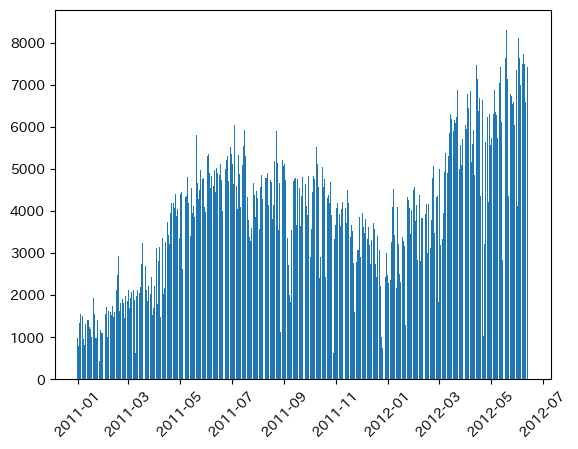

In [ ]:
plt.bar(df_cycle['dteday'], df_cycle['count'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Data Preparation
# Training data
X_train = df_cycle[df_cycle['year'] == 2011][['year', 'mnth']]
y_train = df_cycle[df_cycle['year'] == 2011]['count']

# Testing data
X_test = df_cycle[df_cycle['year'] == 2012][['year', 'mnth']]
y_test = df_cycle[df_cycle['year'] == 2012]['count']

In [ ]:
# Model Training
LR = LinearRegression()
LR.fit(X_train, y_train)

# Prediction
y_pred = LR.predict(X_test)

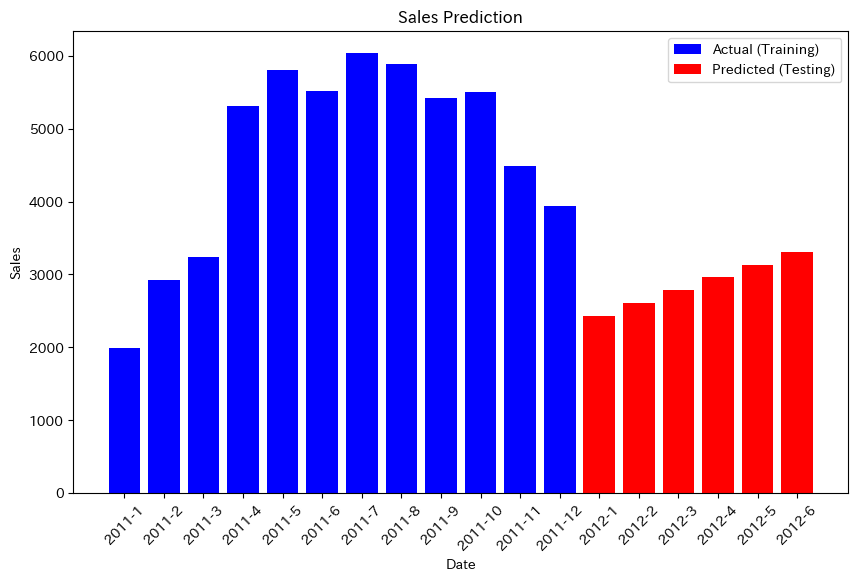

In [ ]:
X_train_date = X_train['year'].astype(str) + '-' + X_train['mnth'].astype(str)
X_test_date = X_test['year'].astype(str) + '-' + X_test['mnth'].astype(str)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(X_train_date, y_train, label='Actual (Training)', color='blue')
plt.bar(X_test_date, y_pred, color='red', label='Predicted (Testing)')
plt.legend()
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2645.3907602824434


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 41.48491433910889
